### Steps to build a Neural Network using Keras for Loan Prediction
1. Loading the dataset
2. Creating training and validation set
3. Defining the architecture of the model
4. Compiling the model(defining loss function, optimizer)
5. Training the model
6. Evaluating model performance on training and validation set

### 1. Loading the dataset

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 0.22.2.post1


In [3]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [4]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [5]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [7]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [8]:
# looking at the shape of the data
data.shape

(614, 12)

In [9]:
# seperating the independent and dependent variables

# storing all the independent variables as x
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [10]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

###2. Creating training and validation set

In [11]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10, test_size=0.2)

In [12]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

###3. Defining the architecture of the model

In [13]:
# checking the version of keras
import keras
print(keras.__version__)

2.4.3


In [14]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.3.0


###a. Creating a model


In [15]:
# importing the sequential model
from keras.models import Sequential 

###b. Defining different layers

In [16]:
# importing different layers from keras
from keras.layers import InputLayer, Dense

In [17]:
# number of input neurons
X_train.shape

(491, 11)

In [18]:
#number of features in the data
X_train.shape[1]

11

In [19]:
# defining input neurons
input_neurons = X_train.shape[1]

In [20]:
# number of output neurons
# since loan prediction is a binary classification problem, we will have single neuron in the output layer
# define number of output neurons
output_neurons = 1

In [21]:
# number of hidden layers and hidden neurons
# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own


In [22]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [23]:
# activation function of different layers

# for now i have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, i have used sigmoid activation function in the final layer

In [24]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [25]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [26]:
 # number of parameters between input and first hidden layer
 input_neurons*neuron_hidden_layer_1

110

In [27]:
# number of parameters between input and first hidden layer
# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1+10

120

In [28]:
# number of parameters between first and second hidden layer
neuron_hidden_layer_1*neuron_hidden_layer_2+5

55

In [29]:
# number of parameters between second hidden and output layer
neuron_hidden_layer_2*output_neurons + 1

6

###4. Compiling the model(defining loss function, optimizer)

In [30]:
# compiling the model

# loss as binary crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric accuracy

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

###5. Training the model

In [31]:
# training the model
# passing the independent and dependent features for training set for training the model
# validation data will be evaluated at the end of each epoch
# setting the epochs as 50
# storing the trained model in model_history variable which will be used to visualize the training process
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 14ms/step - loss: 0.7624 - accuracy: 0.2994 - val_loss: 0.7495 - val_accuracy: 0.3008
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7290 - accuracy: 0.3157 - val_loss: 0.7191 - val_accuracy: 0.3171
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.3910 - val_loss: 0.6940 - val_accuracy: 0.5366
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6788 - accuracy: 0.6660 - val_loss: 0.6703 - val_accuracy: 0.6748
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.6986 - val_loss: 0.6528 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.6925 - val_loss: 0.6372 - val_accuracy: 0.6992
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.6884 - val_loss: 0.6240 - val_accuracy: 0.7073
Epoch 8/50
16/16 [=

###6. Evaluating model performance and validation set

In [32]:
# getting predictions for the validation set 
prediction = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8048780487804879

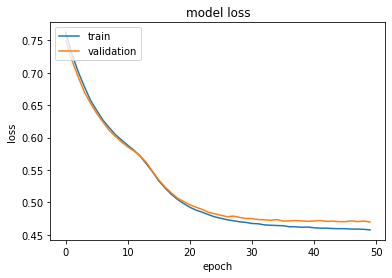

In [34]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

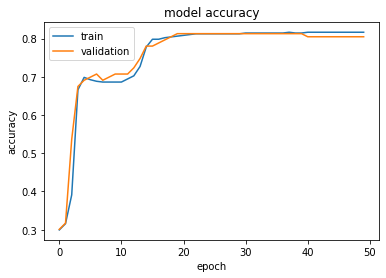

In [35]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [38]:
prediction

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [43]:
data['prediction'] = ('prediction')

In [44]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,prediction
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0,prediction
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0,prediction
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0,prediction
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,prediction
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0,prediction


In [45]:
data.shape

(614, 13)

In [46]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
164,0.0,1.0,0.000000,1.0,0.0,0.113457,0.000000,0.095514,0.358974,1.0,1.0
171,0.0,1.0,1.000000,1.0,0.0,0.638380,0.000000,1.000000,0.615385,1.0,1.0
546,0.0,0.0,0.000000,0.0,0.0,0.039678,0.000000,0.102750,0.051282,1.0,1.0
226,0.0,1.0,0.000000,0.0,1.0,0.056710,0.000000,0.186686,0.743590,1.0,1.0
176,0.0,1.0,0.666667,1.0,0.0,0.023438,0.038856,0.133140,0.743590,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
560,0.0,1.0,0.666667,0.0,0.0,0.043599,0.005808,0.143271,0.743590,1.0,1.0
503,0.0,1.0,0.333333,0.0,0.0,0.048237,0.127247,0.186686,0.743590,1.0,0.0
343,0.0,1.0,1.000000,0.0,0.0,0.037390,0.000000,0.094067,0.743590,1.0,1.0
148,1.0,0.0,0.000000,1.0,0.0,0.121831,0.039984,0.312590,0.743590,1.0,0.0


In [47]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
507,0.0,0.0,0.000000,1.0,0.0,0.042461,0.000000,0.125904,0.743590,1.0,1.0
493,1.0,0.0,0.000000,0.0,1.0,0.211664,0.000000,0.312590,0.743590,1.0,1.0
434,0.0,0.0,0.000000,1.0,0.0,0.044527,0.000000,0.131693,0.743590,1.0,1.0
125,1.0,0.0,0.000000,1.0,0.0,0.043810,0.000000,0.121563,0.743590,1.0,0.0
294,0.0,1.0,0.000000,1.0,0.0,0.027619,0.080015,0.235890,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
82,1.0,1.0,0.666667,1.0,0.0,0.015189,0.045144,0.228654,0.743590,1.0,1.0
295,0.0,1.0,1.000000,1.0,0.0,0.052764,0.030000,0.146165,0.743590,1.0,1.0
369,0.0,1.0,0.000000,1.0,0.0,0.242177,0.126383,0.811867,0.743590,1.0,0.0
450,0.0,1.0,0.666667,0.0,0.0,0.026704,0.030120,0.167873,0.743590,0.0,0.0


In [48]:
Loan_predicted = X_test

In [50]:
Loan_predicted['prediction'] = prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
Loan_predicted

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,prediction
507,0.0,0.0,0.000000,1.0,0.0,0.042461,0.000000,0.125904,0.743590,1.0,1.0,1
493,1.0,0.0,0.000000,0.0,1.0,0.211664,0.000000,0.312590,0.743590,1.0,1.0,1
434,0.0,0.0,0.000000,1.0,0.0,0.044527,0.000000,0.131693,0.743590,1.0,1.0,1
125,1.0,0.0,0.000000,1.0,0.0,0.043810,0.000000,0.121563,0.743590,1.0,0.0,1
294,0.0,1.0,0.000000,1.0,0.0,0.027619,0.080015,0.235890,0.743590,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.0,1.0,0.666667,1.0,0.0,0.015189,0.045144,0.228654,0.743590,1.0,1.0,1
295,0.0,1.0,1.000000,1.0,0.0,0.052764,0.030000,0.146165,0.743590,1.0,1.0,1
369,0.0,1.0,0.000000,1.0,0.0,0.242177,0.126383,0.811867,0.743590,1.0,0.0,1
450,0.0,1.0,0.666667,0.0,0.0,0.026704,0.030120,0.167873,0.743590,0.0,0.0,0


In [62]:
Loan_predicted.to_csv('Loan_prediction_outcome.csv')

Text(0.5, 1.0, 'Loan approved by gender')

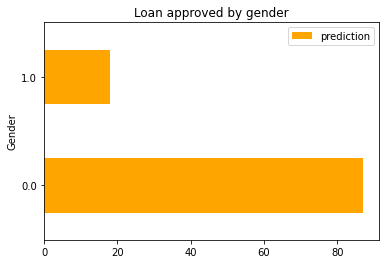

In [55]:
Loan_predicted[['Gender','prediction']].groupby('Gender').sum().plot.barh(color='orange')
plt.title('Loan approved by gender')

### Recall from preprocessing
Gender category conversion
Male - 0.0
Female - 1.0

Hence from the above visualization Male has more approved loan over 80% than their female counterpart

Text(0.5, 1.0, 'Loan approved by Marital Status')

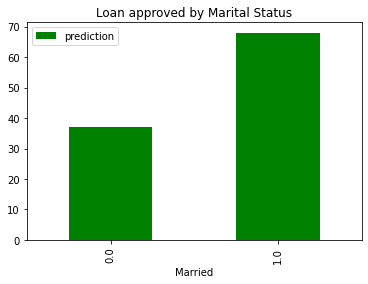

In [57]:
Loan_predicted[['Married','prediction']].groupby('Married').sum().plot.bar(color='green')
plt.title('Loan approved by Marital Status')

Married - 1
Not Married - 0

Married people has more access to loan than unmarried

Text(0.5, 1.0, 'Loan approved by Education')

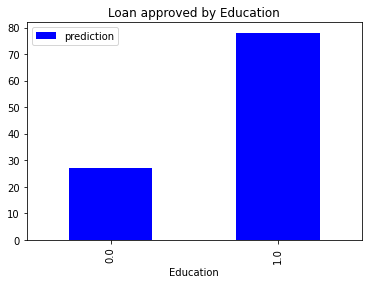

In [60]:
Loan_predicted[['Education','prediction']].groupby('Education').sum().plot.bar(color='blue')
plt.title('Loan approved by Education')

Educated - 1.0
Non-Educated - 0.0

Educated people has more access to loans than non educated